In [ ]:
recalc_strin = out

In [ ]:
%%capture
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git
!pip install pycountry

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.polynomial.polynomial as poly
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import geopandas as gpd
import geoplot as gplt
import pycountry
from google.colab import drive
import os

# suppress warnings (bad practice, i know)
pd.options.mode.chained_assignment = None

In [ ]:
drive.mount('/content/drive')
os.chdir("drive/My Drive/Citadel Datathon 2021")
!ls

Mounted at /content/drive
 1_owid		     Finance		   'Report draft.gdoc'
 2_ecdc		    '^FTSE.csv'		    Report.gdoc
 3_covidtracking    'GOV.UK Transport'	    Stringency
 AppleMobility.csv   London		    ukgov-trans-data.ods
 datathon.ipynb     'Question ideas.gdoc'


In [73]:
countries = ['United Kingdom', 'United States', 'Sweden', 'Taiwan', 'Germany']#, 'Italy']
iso_code = ['GBR', 'USA', 'SWE', 'TWN', 'DEU']#, 'ITA']
corr_1 = [
          -0.408347553685331,
          -0.6121773662058975,
          -0.8895401647609568,
          -0.22172444438230918,
          -0.3446101495747238
]
corr_2 = [
          -0.39978435677864455,
          0.34436216886962395,
          0.5795791909712701,
          -0.5696967124632285,
          -0.5646896089190367
]

# out = pd.DataFrame(list(zip(iso_code, corr_1, corr_2)), 
#                    columns =['iso_code', 'corr_1', 'corr_2'])

out = pd.read_csv('fin_corr_repr.csv')
out.drop('Unnamed: 0', axis=1, inplace=True)
out.columns =['iso_code', 'corr_1', 'corr_2']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'name', 'iso_code', 'gdp_md_est', 'geometry']
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

merge = pd.merge(world, out, on='iso_code')
merge = merge.merge(location, on='name').sort_values(by='name').reset_index()

# merge.plot(column='corr_1', scheme="quantiles",
#           legend=True,cmap='coolwarm', ax=plt.gca(), figsize=(20, 20))
# plt.title('First-half correlations, economy vs reproduction')

# plt.tight_layout()
# plt.show()

# merge.plot(column='corr_2', scheme="quantiles",
#           legend=True,cmap='coolwarm', ax=plt.gca(), figsize=(20, 20))
# plt.title('Second-half correlations, economy vs reproduction')

# plt.tight_layout()
# plt.show()

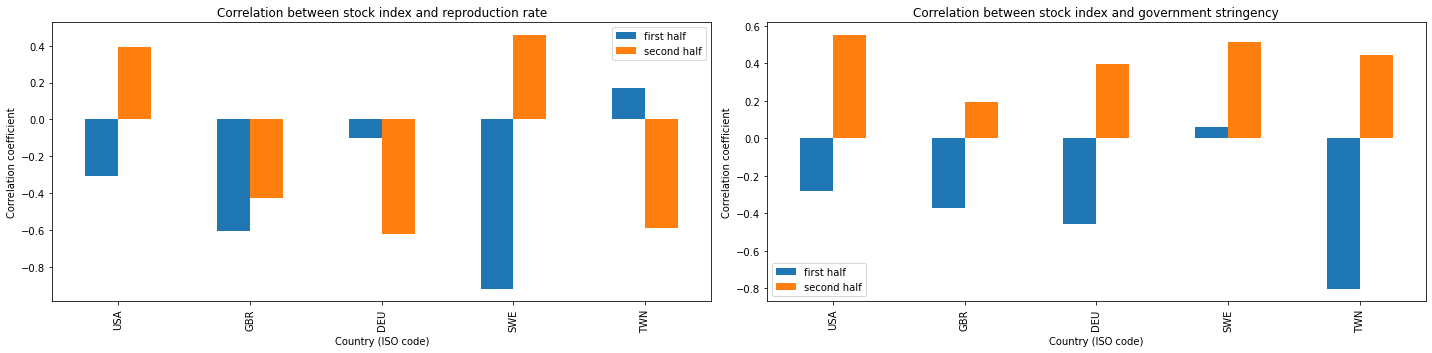

In [74]:
f, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1, 2, 1)

out.plot.bar(x='iso_code', ax=plt.gca())
plt.ylabel('Correlation coefficient')
plt.xlabel("Country (ISO code)")
plt.title('Correlation between stock index and reproduction rate')
plt.legend(["first half", "second half"])
# plt.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.15)
# plt.savefig('fin_corr_repro.png', dpi=1000)
# plt.show()

countries = ['United Kingdom', 'United States', 'Sweden', 'Taiwan', 'Germany']#, 'Italy']
iso_code = ['GBR', 'USA', 'SWE', 'TWN', 'DEU']#, 'ITA']
corr_1 = [
          0.19224391770533017,
          0.12678682736724617,
          -0.8895401647609568,
          -0.763051908283885,
          -0.2254871240366311 
]
corr_2 = [
          0.15084380761890687,
          0.6939695244761137,
          0.5795791909712701,
          0.23956046643125614,
          0.23846379606693682
]

out = pd.read_csv('fin_corr_strin.csv')
out.drop('Unnamed: 0', axis=1, inplace=True)
out.columns =['iso_code', 'corr_1', 'corr_2']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'name', 'iso_code', 'gdp_md_est', 'geometry']
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

merge = pd.merge(world, out, on='iso_code')
merge = merge.merge(location, on='name').sort_values(by='name').reset_index()

# merge.plot(column='corr_1', scheme="quantiles",
#           legend=True,cmap='coolwarm', ax=plt.gca(), figsize=(20, 20))
# plt.title('First-half correlations, economy vs stringency')

# plt.tight_layout()
# plt.show()

# merge.plot(column='corr_2', scheme="quantiles",
#           legend=True,cmap='coolwarm', ax=plt.gca(), figsize=(20, 20))
# plt.title('Second-half correlations, economy vs stringency')

# plt.tight_layout()
# plt.show()

plt.subplot(1, 2, 2)

out.plot.bar(x='iso_code', ax=plt.gca())
plt.ylabel('Correlation coefficient')
plt.legend(["first half", "second half"])
plt.xlabel("Country (ISO code)")
plt.title('Correlation between stock index and government stringency')
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fin_corr.png', dpi=1000)
plt.show()

In [70]:
out.columns

Index(['Unnamed: 0', 'iso_code', 'corr_1', 'corr_2'], dtype='object')

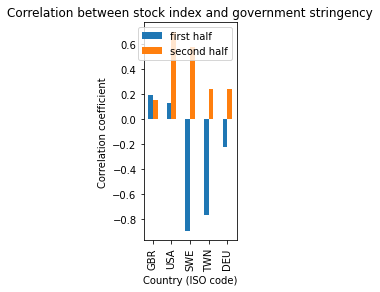

 1_owid		     fin_corr.csv	   London
 2_ecdc		     fin_corr.png	  'Question ideas.gdoc'
 3_covidtracking     fin_corr_repro.png   'Report draft.gdoc'
 AppleMobility.csv   fin_corr_string.png   Report.gdoc
 datathon.ipynb     '^FTSE.csv'		   Stringency
 Finance	    'GOV.UK Transport'	   ukgov-trans-data.ods
